## 11. Conclusion and Recommendations

### Summary of Implementation

This notebook successfully implemented and compared four different movie recommendation approaches:

1. **Original Search**: Simple keyword-based genre filtering
2. **Content-Based Filtering**: TF-IDF vectorization of movie features (genres, overview, keywords, cast, director) 
3. **Collaborative Filtering**: SVD matrix factorization on user ratings data
4. **Hybrid System**: Weighted combination of content-based and collaborative filtering

### Key Findings

- **Content-based filtering** provides the most versatile search experience, understanding semantic queries
- **Collaborative filtering** excels at finding movies with similar user preferences but has cold start issues
- **Hybrid approach** offers the best balance by combining strengths of both methods
- **Enhanced search** provides a backwards-compatible upgrade to the existing system

### Implementation Recommendations

1. **For Production**: Use the hybrid system as it provides the most robust recommendations
2. **For Backwards Compatibility**: Implement enhanced search to improve existing functionality
3. **For New Features**: Content-based filtering enables semantic search capabilities
4. **For User Personalization**: Collaborative filtering when user interaction data is available

The hybrid recommendation system successfully addresses the limitations of the original search while providing more relevant and diverse movie recommendations.

In [ ]:
# Performance analysis and evaluation\nimport time\nfrom collections import defaultdict\n\ndef evaluate_recommendation_diversity(recommendations):\n    \"\"\"Calculate diversity metrics for recommendations\"\"\"\n    if not recommendations or isinstance(recommendations, str):\n        return {'genre_diversity': 0, 'year_diversity': 0, 'rating_std': 0}\n    \n    # Genre diversity\n    all_genres = []\n    years = []\n    ratings = []\n    \n    for rec in recommendations:\n        if 'genres' in rec and rec['genres']:\n            all_genres.extend(rec['genres'])\n        if 'year' in rec and rec['year'] != 'Unknown':\n            years.append(rec['year'])\n        if 'rating' in rec:\n            ratings.append(rec['rating'])\n        elif 'avg_rating' in rec:\n            ratings.append(rec['avg_rating'])\n    \n    genre_diversity = len(set(all_genres)) if all_genres else 0\n    year_diversity = max(years) - min(years) if years else 0\n    rating_std = np.std(ratings) if ratings else 0\n    \n    return {\n        'genre_diversity': genre_diversity,\n        'year_diversity': year_diversity, \n        'rating_std': rating_std,\n        'avg_rating': np.mean(ratings) if ratings else 0\n    }\n\ndef measure_performance(method_func, *args, **kwargs):\n    \"\"\"Measure execution time of a method\"\"\"\n    start_time = time.time()\n    result = method_func(*args, **kwargs)\n    end_time = time.time()\n    return result, end_time - start_time\n\nprint(\"=\"*70)\nprint(\"PERFORMANCE ANALYSIS OF RECOMMENDATION SYSTEMS\")\nprint(\"=\"*70)\n\n# Test queries for evaluation\neval_queries = [\n    \"horror movie suitable for teenagers\",\n    \"romantic comedy\",\n    \"action adventure\", \n    \"animated family movie\",\n    \"war military\"\n]\n\neval_movie = \"Toy Story\"\n\n# Initialize results storage\nperformance_results = defaultdict(list)\ndiversity_results = defaultdict(list)\nmethod_names = ['Original Search', 'Content-Based', 'Hybrid Query', 'Enhanced Search']\n\nprint(\"\\n🔍 QUERY-BASED EVALUATION\")\nprint(\"=\"*40)\n\nfor query in eval_queries:\n    print(f\"\\nEvaluating query: '{query}'\")\n    print(\"-\" * 30)\n    \n    # Original search\n    original_results, time_original = measure_performance(\n        search_movies, query, movies_enhanced\n    )\n    original_recs = original_results.get('results', [])[:5]\n    original_diversity = evaluate_recommendation_diversity(original_recs)\n    \n    # Content-based\n    content_recs, time_content = measure_performance(\n        content_recommender.get_recommendations_by_query, query, 5\n    )\n    content_diversity = evaluate_recommendation_diversity(content_recs)\n    \n    # Hybrid query\n    hybrid_recs, time_hybrid = measure_performance(\n        hybrid_recommender.get_hybrid_query_recommendations, query, 5\n    )\n    hybrid_diversity = evaluate_recommendation_diversity(hybrid_recs)\n    \n    # Enhanced search  \n    enhanced_recs, time_enhanced = measure_performance(\n        hybrid_recommender.get_enhanced_search_recommendations, query, 5\n    )\n    enhanced_diversity = evaluate_recommendation_diversity(enhanced_recs)\n    \n    # Store results\n    times = [time_original, time_content, time_hybrid, time_enhanced]\n    diversities = [original_diversity, content_diversity, hybrid_diversity, enhanced_diversity]\n    result_counts = [len(original_recs), len(content_recs), len(hybrid_recs), len(enhanced_recs)]\n    \n    for i, (method, time_taken, diversity, count) in enumerate(zip(method_names, times, diversities, result_counts)):\n        performance_results[method].append(time_taken)\n        diversity_results[method].append(diversity)\n        print(f\"{method}: {count} results, {time_taken:.3f}s, avg_rating: {diversity['avg_rating']:.2f}\")\n\n# Movie-based evaluation\nprint(f\"\\n\\n🎬 MOVIE-BASED EVALUATION (Similar to '{eval_movie}')\")\nprint(\"=\"*50)\n\n# Content-based movie recommendations\ncontent_movie_recs, time_content_movie = measure_performance(\n    content_recommender.get_recommendations, eval_movie, 5\n)\ncontent_movie_diversity = evaluate_recommendation_diversity(content_movie_recs)\n\n# Collaborative filtering movie recommendations\ncollab_movie_recs, time_collab_movie = measure_performance(\n    collab_recommender.get_movie_recommendations_by_title, eval_movie, 5\n)\ncollab_movie_diversity = evaluate_recommendation_diversity(collab_movie_recs if not isinstance(collab_movie_recs, str) else [])\n\n# Hybrid movie recommendations\nhybrid_movie_recs, time_hybrid_movie = measure_performance(\n    hybrid_recommender.get_hybrid_recommendations, eval_movie, 5\n)\nhybrid_movie_diversity = evaluate_recommendation_diversity(hybrid_movie_recs if not isinstance(hybrid_movie_recs, str) else [])\n\nprint(f\"Content-Based: {len(content_movie_recs)} results, {time_content_movie:.3f}s\")\nprint(f\"Collaborative: {len(collab_movie_recs) if not isinstance(collab_movie_recs, str) else 0} results, {time_collab_movie:.3f}s\")\nprint(f\"Hybrid: {len(hybrid_movie_recs) if not isinstance(hybrid_movie_recs, str) else 0} results, {time_hybrid_movie:.3f}s\")\n\nprint(\"\\n\\n📊 OVERALL PERFORMANCE SUMMARY\")\nprint(\"=\"*40)\n\n# Calculate average performance metrics\nfor method in method_names:\n    if performance_results[method]:\n        avg_time = np.mean(performance_results[method])\n        avg_genre_diversity = np.mean([d['genre_diversity'] for d in diversity_results[method]])\n        avg_rating = np.mean([d['avg_rating'] for d in diversity_results[method] if d['avg_rating'] > 0])\n        \n        print(f\"\\n{method}:\")\n        print(f\"  Avg Time: {avg_time:.3f}s\")\n        print(f\"  Avg Genre Diversity: {avg_genre_diversity:.1f} unique genres\")\n        print(f\"  Avg Rating: {avg_rating:.2f}\" if avg_rating > 0 else \"  Avg Rating: N/A\")\n\nprint(\"\\n\\n🏆 RECOMMENDATION SYSTEM STRENGTHS & WEAKNESSES\")\nprint(\"=\"*55)\n\nprint(\"\\n1. ORIGINAL SEARCH:\")\nprint(\"   ✅ Strengths: Fast, simple keyword matching\")\nprint(\"   ❌ Weaknesses: Limited to predefined genre keywords, no semantic understanding\")\n\nprint(\"\\n2. CONTENT-BASED FILTERING:\")\nprint(\"   ✅ Strengths: Semantic understanding, works with any query, considers movie features\")\nprint(\"   ❌ Weaknesses: No user preference learning, can be narrow in recommendations\")\n\nprint(\"\\n3. COLLABORATIVE FILTERING:\")\nprint(\"   ✅ Strengths: Learns from user behavior, discovers unexpected similarities\")\nprint(\"   ❌ Weaknesses: Cold start problem, requires user-item interaction data\")\n\nprint(\"\\n4. HYBRID APPROACH:\")\nprint(\"   ✅ Strengths: Combines benefits of both methods, more robust recommendations\")\nprint(\"   ❌ Weaknesses: More complex, potentially slower, requires tuning of weights\")\n\nprint(\"\\n5. ENHANCED SEARCH:\")\nprint(\"   ✅ Strengths: Backwards compatible, improves existing search with ML\")\nprint(\"   ❌ Weaknesses: Still limited by original search constraints\")"

## 10. Performance Analysis and Evaluation

In [ ]:
# Comprehensive comparison of all methods\nprint(\"=\"*80)\nprint(\"COMPREHENSIVE COMPARISON OF RECOMMENDATION METHODS\")\nprint(\"=\"*80)\n\ntest_queries = [\n    \"horror movie suitable for teenagers\",\n    \"action adventure movie\", \n    \"romantic comedy\",\n    \"war military movie\",\n    \"animated family movie\"\n]\n\ntest_movie = \"Toy Story\"\n\nprint(f\"\\n{'='*50}\")\nprint(f\"MOVIE-BASED RECOMMENDATIONS FOR: {test_movie}\")\nprint(f\"{'='*50}\")\n\n# Content-based recommendations\nprint(\"\\n1. CONTENT-BASED FILTERING\")\nprint(\"-\" * 30)\ncontent_recs = content_recommender.get_recommendations(test_movie, 3)\nfor i, rec in enumerate(content_recs, 1):\n    print(f\"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}\")\n    print(f\"   Similarity: {rec['similarity_score']:.3f} | Genres: {', '.join(rec['genres'][:2])}\")\n\n# Collaborative filtering recommendations  \nprint(\"\\n2. COLLABORATIVE FILTERING\")\nprint(\"-\" * 30)\ncollab_recs = collab_recommender.get_movie_recommendations_by_title(test_movie, 3)\nif isinstance(collab_recs, str):\n    print(collab_recs)\nelse:\n    for i, rec in enumerate(collab_recs, 1):\n        print(f\"{i}. {rec['title']} ({rec['year']}) - Avg Rating: {rec['avg_rating']:.1f}\")\n        print(f\"   Similarity: {rec['similarity_score']:.3f} | Genres: {', '.join(rec['genres'][:2])}\")\n\n# Hybrid recommendations\nprint(\"\\n3. HYBRID APPROACH\")\nprint(\"-\" * 30)\nhybrid_recs = hybrid_recommender.get_hybrid_recommendations(test_movie, 3)\nif isinstance(hybrid_recs, str):\n    print(hybrid_recs)\nelse:\n    for i, rec in enumerate(hybrid_recs, 1):\n        print(f\"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}\")\n        print(f\"   Hybrid Score: {rec['hybrid_score']:.3f} | Genres: {', '.join(rec['genres'][:2])}\")\n\nprint(f\"\\n\\n{'='*60}\")\nprint(\"QUERY-BASED RECOMMENDATIONS COMPARISON\")\nprint(f\"{'='*60}\")\n\nfor query in test_queries:\n    print(f\"\\n\\n🔍 Query: '{query}'\")\n    print(\"=\"*50)\n    \n    # Original search\n    print(\"\\n1. ORIGINAL SEARCH\")\n    print(\"-\" * 20)\n    original_results = search_movies(query, movies_enhanced)\n    if original_results.get('results'):\n        top_3 = original_results['results'][:3]\n        for i, movie in enumerate(top_3, 1):\n            release_date = movie['release_date'][:10] if movie['release_date'] != 'NaT' else 'Unknown'\n            print(f\"{i}. {movie['title']} ({release_date}) - Rating: {movie['rating']}\")\n    else:\n        print(\"No results found\")\n    \n    # Content-based\n    print(\"\\n2. CONTENT-BASED FILTERING\")\n    print(\"-\" * 25)\n    content_query_recs = content_recommender.get_recommendations_by_query(query, 3)\n    if content_query_recs:\n        for i, rec in enumerate(content_query_recs, 1):\n            print(f\"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}\")\n            print(f\"   Similarity: {rec['similarity_score']:.3f}\")\n    else:\n        print(\"No results found\")\n    \n    # Hybrid approach\n    print(\"\\n3. HYBRID APPROACH\")\n    print(\"-\" * 18)\n    hybrid_query_recs = hybrid_recommender.get_hybrid_query_recommendations(query, 3)\n    if hybrid_query_recs:\n        for i, rec in enumerate(hybrid_query_recs, 1):\n            print(f\"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}\")\n            print(f\"   Hybrid Score: {rec['hybrid_score']:.3f}\")\n    else:\n        print(\"No results found\")\n    \n    # Enhanced search (combines original + content-based)\n    print(\"\\n4. ENHANCED SEARCH\")\n    print(\"-\" * 18)\n    enhanced_recs = hybrid_recommender.get_enhanced_search_recommendations(query, 3)\n    if enhanced_recs:\n        for i, rec in enumerate(enhanced_recs, 1):\n            if 'combined_score' in rec:\n                print(f\"{i}. {rec['title']} - Rating: {rec['rating']}\")\n                print(f\"   Combined Score: {rec['combined_score']:.3f}\")\n            else:\n                print(f\"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}\")\n                print(f\"   Hybrid Score: {rec['hybrid_score']:.3f}\")\n    else:\n        print(\"No results found\")"

## 9. Comprehensive Method Comparison

Comparing all four approaches: Original Search, Content-Based, Collaborative Filtering, and Hybrid.

In [ ]:
class HybridRecommender:
    def __init__(self, content_recommender, collab_recommender, movies_df):
        self.content_recommender = content_recommender
        self.collab_recommender = collab_recommender
        self.movies_df = movies_df
        
    def get_hybrid_recommendations(self, movie_title, n_recommendations=10, 
                                 content_weight=0.6, collab_weight=0.4):
        """
        Get hybrid recommendations combining content-based and collaborative filtering
        """
        print(f"Getting hybrid recommendations for '{movie_title}'")
        print(f"Weights: Content-based={content_weight}, Collaborative={collab_weight}")
        
        # Get recommendations from both methods
        content_recs = self.content_recommender.get_recommendations(movie_title, n_recommendations*2)
        collab_recs = self.collab_recommender.get_movie_recommendations_by_title(movie_title, n_recommendations*2)
        
        if isinstance(content_recs, str) or isinstance(collab_recs, str):
            # If one method fails, use the other
            if isinstance(content_recs, str) and not isinstance(collab_recs, str):
                print("Content-based failed, using collaborative filtering only")
                return collab_recs[:n_recommendations]
            elif isinstance(collab_recs, str) and not isinstance(content_recs, str):
                print("Collaborative filtering failed, using content-based only")
                return content_recs[:n_recommendations]
            else:
                return f"Both methods failed for movie '{movie_title}'"
        
        # Create a dictionary to combine scores
        combined_scores = {}\n        \n        # Add content-based recommendations\n        for rec in content_recs:\n            title = rec['title']\n            combined_scores[title] = {\n                'title': title,\n                'content_score': rec['similarity_score'] * content_weight,\n                'collab_score': 0,\n                'genres': rec['genres'],\n                'rating': rec['rating'],\n                'year': rec['year'],\n                'director': rec.get('director', ''),\n                'cast': rec.get('cast', [])\n            }\n        \n        # Add collaborative filtering recommendations\n        for rec in collab_recs:\n            title = rec['title']\n            if title in combined_scores:\n                combined_scores[title]['collab_score'] = rec['similarity_score'] * collab_weight\n            else:\n                combined_scores[title] = {\n                    'title': title,\n                    'content_score': 0,\n                    'collab_score': rec['similarity_score'] * collab_weight,\n                    'genres': rec['genres'],\n                    'rating': rec['avg_rating'],\n                    'year': rec['year']\n                }\n        \n        # Calculate combined scores\n        for title in combined_scores:\n            combined_scores[title]['hybrid_score'] = (\n                combined_scores[title]['content_score'] + \n                combined_scores[title]['collab_score']\n            )\n        \n        # Sort by hybrid score\n        sorted_recs = sorted(combined_scores.values(), \n                           key=lambda x: x['hybrid_score'], reverse=True)\n        \n        return sorted_recs[:n_recommendations]\n    \n    def get_hybrid_query_recommendations(self, query, n_recommendations=10,\n                                       content_weight=0.7, popularity_weight=0.3):\n        \"\"\"\n        Get hybrid recommendations for a text query\n        \"\"\"\n        print(f\"Getting hybrid recommendations for query: '{query}'\")\n        \n        # Get content-based recommendations for the query\n        content_recs = self.content_recommender.get_recommendations_by_query(query, n_recommendations*2)\n        \n        # Get popular movies as baseline\n        popular_recs = self.collab_recommender.get_popular_movies(n_recommendations*2)\n        \n        # Combine recommendations\n        combined_scores = {}\n        \n        # Add content-based recommendations\n        for rec in content_recs:\n            title = rec['title']\n            combined_scores[title] = {\n                'title': title,\n                'content_score': rec['similarity_score'] * content_weight,\n                'popularity_score': 0,\n                'genres': rec['genres'],\n                'rating': rec['rating'],\n                'year': rec['year'],\n                'overview': rec.get('overview', '')\n            }\n        \n        # Add popularity scores\n        for rec in popular_recs:\n            title = rec['title']\n            # Normalize popularity score to 0-1 range\n            norm_popularity = min(rec['popularity_score'] / 100, 1.0)\n            \n            if title in combined_scores:\n                combined_scores[title]['popularity_score'] = norm_popularity * popularity_weight\n            else:\n                combined_scores[title] = {\n                    'title': title,\n                    'content_score': 0,\n                    'popularity_score': norm_popularity * popularity_weight,\n                    'genres': rec['genres'],\n                    'rating': rec['avg_rating'],\n                    'year': rec['year']\n                }\n        \n        # Calculate combined scores\n        for title in combined_scores:\n            combined_scores[title]['hybrid_score'] = (\n                combined_scores[title]['content_score'] + \n                combined_scores[title]['popularity_score']\n            )\n        \n        # Sort by hybrid score\n        sorted_recs = sorted(combined_scores.values(), \n                           key=lambda x: x['hybrid_score'], reverse=True)\n        \n        # Filter out movies with zero hybrid score\n        filtered_recs = [rec for rec in sorted_recs if rec['hybrid_score'] > 0]\n        \n        return filtered_recs[:n_recommendations]\n    \n    def get_enhanced_search_recommendations(self, query, n_recommendations=10):\n        \"\"\"\n        Enhanced search that combines the original search logic with content-based filtering\n        \"\"\"\n        print(f\"Enhanced search for: '{query}'\")\n        \n        # First try original search logic\n        original_results = search_movies(query, self.movies_df)\n        \n        if original_results.get('results'):\n            print(f\"Original search found {len(original_results['results'])} results\")\n            # Get top movies from original search and enhance with similarity\n            top_original = original_results['results'][:20]  # Get top 20\n            \n            # Enhance with content-based scoring\n            enhanced_results = []\n            for movie in top_original:\n                # Get content-based similarity for this movie\n                content_recs = self.content_recommender.get_recommendations_by_query(query, 50)\n                \n                # Find this movie in content recommendations\n                content_score = 0\n                for rec in content_recs:\n                    if rec['title'] == movie['title']:\n                        content_score = rec['similarity_score']\n                        break\n                \n                enhanced_results.append({\n                    'title': movie['title'],\n                    'rating': movie['rating'],\n                    'release_date': movie['release_date'],\n                    'content_score': content_score,\n                    'combined_score': movie['rating'] * 0.3 + content_score * 0.7\n                })\n            \n            # Sort by combined score\n            enhanced_results.sort(key=lambda x: x['combined_score'], reverse=True)\n            return enhanced_results[:n_recommendations]\n        \n        else:\n            print(\"Original search found no results, using content-based only\")\n            return self.get_hybrid_query_recommendations(query, n_recommendations)\n\n# Initialize hybrid recommender\nprint(\"=\"*60)\nprint(\"BUILDING HYBRID RECOMMENDATION SYSTEM\")\nprint(\"=\"*60)\n\nhybrid_recommender = HybridRecommender(content_recommender, collab_recommender, movies_enhanced)\nprint(\"Hybrid recommender initialized successfully!\")"

## 8. Hybrid Recommendation System

Combining content-based and collaborative filtering for improved recommendations.

In [ ]:
# Test collaborative filtering recommendations
print("Testing Collaborative Filtering Recommendations")
print("="*50)

# Test with specific movie
test_movie = "Toy Story"
print(f"\nCollaborative filtering recommendations similar to '{test_movie}':")
print("-" * 50)
recs = collab_recommender.get_movie_recommendations_by_title(test_movie, 5)
if isinstance(recs, str):
    print(recs)
else:
    for i, rec in enumerate(recs, 1):
        print(f"{i}. {rec['title']} ({rec['year']}) - Avg Rating: {rec['avg_rating']:.1f}")
        print(f"   Genres: {', '.join(rec['genres'][:3])}")
        print(f"   Similarity: {rec['similarity_score']:.3f}")
        print()

# Test user recommendations
print(f"\nRecommendations for User 1:")
print("-" * 30)
user_recs = collab_recommender.get_user_recommendations(1, 5)
if isinstance(user_recs, str):
    print(user_recs)
else:
    for i, rec in enumerate(user_recs, 1):
        print(f"{i}. {rec['title']} ({rec['year']})")
        print(f"   Predicted Rating: {rec['predicted_rating']:.2f}")
        print(f"   Genres: {', '.join(rec['genres'][:3])}")
        print()

# Show popular movies
print(f"\nMost Popular Movies (Collaborative Filtering):")
print("-" * 40)
popular_recs = collab_recommender.get_popular_movies(5)
for i, rec in enumerate(popular_recs, 1):
    print(f"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['avg_rating']:.1f}")
    print(f"   Ratings Count: {rec['num_ratings']}")
    print(f"   Popularity Score: {rec['popularity_score']:.2f}")
    print()

In [ ]:
class CollaborativeFilteringRecommender:
    def __init__(self, user_item_matrix, movies_df, ratings_df):
        self.user_item_matrix = user_item_matrix
        self.movies_df = movies_df
        self.ratings_df = ratings_df
        self.svd_model = None
        self.movie_id_to_title = {}
        self.title_to_movie_id = {}
        self._prepare_mappings()
        self._build_model()
    
    def _prepare_mappings(self):
        """Create mappings between movie IDs and titles"""
        # Create movie ID to title mapping
        for _, movie in self.movies_df.iterrows():
            movie_id = int(movie['id'])
            if movie_id in self.user_item_matrix.columns:
                self.movie_id_to_title[movie_id] = movie['title']
                self.title_to_movie_id[movie['title']] = movie_id
    
    def _build_model(self):
        """Build SVD model for collaborative filtering"""
        print("Building SVD model for collaborative filtering...")
        
        # Convert to sparse matrix for efficiency
        sparse_matrix = csr_matrix(self.user_item_matrix.values)
        
        # Use SVD for matrix factorization
        self.svd_model = TruncatedSVD(n_components=50, random_state=42)
        self.user_factors = self.svd_model.fit_transform(sparse_matrix)
        self.item_factors = self.svd_model.components_.T
        
        print(f"SVD model built with {self.svd_model.n_components} components")
        print(f"Explained variance ratio: {self.svd_model.explained_variance_ratio_.sum():.3f}")
    
    def get_movie_recommendations_by_id(self, movie_id, n_recommendations=10):
        """Get collaborative filtering recommendations for a movie ID"""
        if movie_id not in self.user_item_matrix.columns:
            return f"Movie ID {movie_id} not found in ratings data"
        
        # Get movie index in the matrix
        movie_idx = list(self.user_item_matrix.columns).index(movie_id)
        
        # Calculate item-item similarity using the factorized matrices
        movie_vector = self.item_factors[movie_idx].reshape(1, -1)
        similarities = cosine_similarity(movie_vector, self.item_factors).flatten()
        
        # Get top similar movies
        similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
        
        recommendations = []
        for idx in similar_indices:
            similar_movie_id = self.user_item_matrix.columns[idx]
            if similar_movie_id in self.movie_id_to_title:
                # Get movie details
                movie_info = self.movies_df[self.movies_df['id'] == similar_movie_id].iloc[0]
                
                # Calculate average rating from ratings data
                avg_rating = self.ratings_df[self.ratings_df['movieId'] == similar_movie_id]['rating'].mean()
                
                recommendations.append({
                    'title': self.movie_id_to_title[similar_movie_id],
                    'movie_id': similar_movie_id,
                    'similarity_score': similarities[idx],
                    'avg_rating': avg_rating,
                    'genres': movie_info['genres_list'],
                    'year': int(movie_info['release_year']) if pd.notna(movie_info['release_year']) else 'Unknown'
                })
        
        return recommendations
    
    def get_movie_recommendations_by_title(self, movie_title, n_recommendations=10):
        """Get collaborative filtering recommendations for a movie title"""
        if movie_title not in self.title_to_movie_id:
            return f"Movie '{movie_title}' not found in ratings data"
        
        movie_id = self.title_to_movie_id[movie_title]
        return self.get_movie_recommendations_by_id(movie_id, n_recommendations)
    
    def get_user_recommendations(self, user_id, n_recommendations=10):
        """Get recommendations for a specific user"""
        if user_id not in self.user_item_matrix.index:
            return f"User {user_id} not found in ratings data"
        
        # Get user index
        user_idx = list(self.user_item_matrix.index).index(user_id)
        
        # Get user's ratings
        user_ratings = self.user_item_matrix.loc[user_id]
        rated_movies = user_ratings[user_ratings > 0].index.tolist()
        
        # Predict ratings for unrated movies
        user_vector = self.user_factors[user_idx]
        predicted_ratings = np.dot(user_vector, self.item_factors.T)
        
        # Get recommendations for unrated movies
        unrated_movies = [mid for mid in self.user_item_matrix.columns if mid not in rated_movies]
        movie_scores = []
        
        for movie_id in unrated_movies:
            if movie_id in self.movie_id_to_title:
                movie_idx = list(self.user_item_matrix.columns).index(movie_id)
                predicted_rating = predicted_ratings[movie_idx]
                movie_scores.append((movie_id, predicted_rating))
        
        # Sort by predicted rating
        movie_scores.sort(key=lambda x: x[1], reverse=True)
        
        recommendations = []
        for movie_id, predicted_rating in movie_scores[:n_recommendations]:
            movie_info = self.movies_df[self.movies_df['id'] == movie_id].iloc[0]
            recommendations.append({
                'title': self.movie_id_to_title[movie_id],
                'movie_id': movie_id,
                'predicted_rating': predicted_rating,
                'genres': movie_info['genres_list'],
                'year': int(movie_info['release_year']) if pd.notna(movie_info['release_year']) else 'Unknown'
            })
        
        return recommendations
    
    def get_popular_movies(self, n_recommendations=10):
        """Get popular movies based on collaborative filtering data"""
        # Calculate popularity score (average rating * number of ratings)
        movie_stats = self.ratings_df.groupby('movieId').agg({
            'rating': ['mean', 'count']
        }).round(2)
        
        movie_stats.columns = ['avg_rating', 'num_ratings']
        movie_stats = movie_stats.reset_index()
        
        # Filter movies with at least 50 ratings
        popular_movies = movie_stats[movie_stats['num_ratings'] >= 50].copy()
        popular_movies['popularity_score'] = popular_movies['avg_rating'] * np.log(popular_movies['num_ratings'])
        popular_movies = popular_movies.sort_values('popularity_score', ascending=False)
        
        recommendations = []
        for _, movie_stat in popular_movies.head(n_recommendations).iterrows():
            movie_id = movie_stat['movieId']
            if movie_id in self.movie_id_to_title:
                movie_info = self.movies_df[self.movies_df['id'] == movie_id].iloc[0]
                recommendations.append({
                    'title': self.movie_id_to_title[movie_id],
                    'movie_id': movie_id,
                    'avg_rating': movie_stat['avg_rating'],
                    'num_ratings': movie_stat['num_ratings'],
                    'popularity_score': movie_stat['popularity_score'],
                    'genres': movie_info['genres_list'],
                    'year': int(movie_info['release_year']) if pd.notna(movie_info['release_year']) else 'Unknown'
                })
        
        return recommendations

# Initialize collaborative filtering recommender
print("="*60)
print("BUILDING COLLABORATIVE FILTERING RECOMMENDATION SYSTEM")
print("="*60)

collab_recommender = CollaborativeFilteringRecommender(user_item_matrix, movies_enhanced, ratings_filtered)

In [ ]:
# Prepare ratings data for collaborative filtering
print("Preparing ratings data for collaborative filtering...")
print(f"Ratings dataset shape: {ratings_df.shape}")
print(f"Unique users: {ratings_df['userId'].nunique()}")
print(f"Unique movies: {ratings_df['movieId'].nunique()}")
print(f"Rating range: {ratings_df['rating'].min()} - {ratings_df['rating'].max()}")

# Check overlap between ratings and movies datasets
ratings_movie_ids = set(ratings_df['movieId'].unique())
movies_movie_ids = set(movies_enhanced['id'].astype(str).astype(int).unique())
common_movies = ratings_movie_ids.intersection(movies_movie_ids)

print(f"\nDataset overlap:")
print(f"Movies in ratings: {len(ratings_movie_ids)}")
print(f"Movies in metadata: {len(movies_movie_ids)}")
print(f"Common movies: {len(common_movies)}")

# Filter ratings to only include movies we have metadata for
ratings_filtered = ratings_df[ratings_df['movieId'].isin(common_movies)].copy()
print(f"Filtered ratings shape: {ratings_filtered.shape}")

# Create user-item matrix
print("Creating user-item rating matrix...")
user_item_matrix = ratings_filtered.pivot_table(
    index='userId', 
    columns='movieId', 
    values='rating'
).fillna(0)

print(f"User-item matrix shape: {user_item_matrix.shape}")
print(f"Sparsity: {(user_item_matrix == 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]):.3f}")

## 7. Collaborative Filtering Recommendation System

Collaborative filtering recommends items based on user-item interactions and patterns in user behavior.

In [ ]:
# Test content-based recommendations
print("Testing Content-Based Recommendations")
print("="*50)

# Test with specific movie
test_movie = "Toy Story"
print(f"\nRecommendations similar to '{test_movie}':")
print("-" * 40)
recs = content_recommender.get_recommendations(test_movie, 5)
for i, rec in enumerate(recs, 1):
    print(f"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}")
    print(f"   Genres: {', '.join(rec['genres'][:3])}")
    print(f"   Similarity: {rec['similarity_score']:.3f}")
    print()

# Test with text queries from the original search
test_queries = [
    "horror movie suitable for teenagers",
    "spooky scary thriller",
    "action adventure",
    "romantic comedy",
    "war military"
]

for query in test_queries:
    print(f"\nContent-based results for: '{query}'")
    print("-" * 40)
    recs = content_recommender.get_recommendations_by_query(query, 3)
    if recs:
        for i, rec in enumerate(recs, 1):
            print(f"{i}. {rec['title']} ({rec['year']}) - Rating: {rec['rating']:.1f}")
            print(f"   Similarity: {rec['similarity_score']:.3f}")
    else:
        print("No recommendations found")
    print()

In [ ]:
class ContentBasedRecommender:
    def __init__(self, movies_df):
        self.movies_df = movies_df.copy()
        self.tfidf_vectorizer = None
        self.content_matrix = None
        self.movie_indices = None
        self._prepare_content_features()
        self._build_content_matrix()
    
    def _prepare_content_features(self):
        """Combine all content features into a single text representation"""
        print("Preparing content features...")
        
        def clean_text(text):
            if isinstance(text, list):
                return ' '.join([str(item).lower().replace(' ', '') for item in text])
            return str(text).lower().replace(' ', '') if text else ''
        
        # Prepare content features
        self.movies_df['content_features'] = (
            self.movies_df['genres_list'].apply(clean_text) + ' ' +
            self.movies_df['keywords_list'].apply(clean_text) + ' ' +
            self.movies_df['cast_list'].apply(clean_text) + ' ' +
            self.movies_df['director'].apply(clean_text) + ' ' +
            self.movies_df['overview'].fillna('').str.lower()
        )
        
        # Create mapping from movie title to index
        self.movie_indices = pd.Series(self.movies_df.index, index=self.movies_df['title']).to_dict()
        
        print(f"Prepared content features for {len(self.movies_df)} movies")
    
    def _build_content_matrix(self):
        """Build TF-IDF matrix from content features"""
        print("Building TF-IDF content matrix...")
        
        # Use TF-IDF to vectorize content features
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=10000,
            stop_words='english',
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.8
        )
        
        self.content_matrix = self.tfidf_vectorizer.fit_transform(self.movies_df['content_features'])
        print(f"Content matrix shape: {self.content_matrix.shape}")
    
    def get_recommendations(self, movie_title, n_recommendations=10):
        """Get content-based recommendations for a movie"""
        if movie_title not in self.movie_indices:
            return f"Movie '{movie_title}' not found in database"
        
        # Get movie index
        movie_idx = self.movie_indices[movie_title]
        
        # Calculate cosine similarity
        movie_vector = self.content_matrix[movie_idx]
        similarities = cosine_similarity(movie_vector, self.content_matrix).flatten()
        
        # Get top similar movies (excluding the movie itself)
        similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
        
        # Prepare recommendations
        recommendations = []
        for idx in similar_indices:
            movie = self.movies_df.iloc[idx]
            recommendations.append({
                'title': movie['title'],
                'genres': movie['genres_list'],
                'rating': movie['vote_average'],
                'year': int(movie['release_year']) if pd.notna(movie['release_year']) else 'Unknown',
                'similarity_score': similarities[idx],
                'director': movie['director'],
                'cast': movie['cast_list'][:3]  # Top 3 cast members
            })
        
        return recommendations
    
    def get_recommendations_by_query(self, query, n_recommendations=10):
        """Get recommendations based on a text query"""
        print(f"Getting content-based recommendations for query: '{query}'")
        
        # Transform query using the same TF-IDF vectorizer
        query_vector = self.tfidf_vectorizer.transform([query.lower()])
        
        # Calculate similarities
        similarities = cosine_similarity(query_vector, self.content_matrix).flatten()
        
        # Get top similar movies
        similar_indices = similarities.argsort()[::-1][:n_recommendations]
        
        # Prepare recommendations
        recommendations = []
        for idx in similar_indices:
            if similarities[idx] > 0:  # Only include movies with positive similarity
                movie = self.movies_df.iloc[idx]
                recommendations.append({
                    'title': movie['title'],
                    'genres': movie['genres_list'],
                    'rating': movie['vote_average'],
                    'year': int(movie['release_year']) if pd.notna(movie['release_year']) else 'Unknown',
                    'similarity_score': similarities[idx],
                    'director': movie['director'],
                    'overview': movie['overview'][:100] + '...' if len(movie['overview']) > 100 else movie['overview']
                })
        
        return recommendations

# Initialize content-based recommender
print("="*60)
print("BUILDING CONTENT-BASED RECOMMENDATION SYSTEM")
print("="*60)

content_recommender = ContentBasedRecommender(movies_enhanced)

## 6. Content-Based Recommendation System

Content-based filtering recommends items similar to those a user has liked, based on item features.

In [ ]:
# Process and merge the datasets
def parse_json_field(x):
    """Parse JSON-like fields safely"""
    try:
        if pd.isna(x):
            return []
        data = eval(x)
        if isinstance(data, list):
            return [item.get('name', '') for item in data if isinstance(item, dict)]
        return []
    except:
        return []

def get_top_cast(cast_str, n=5):
    """Extract top N cast members"""
    try:
        if pd.isna(cast_str):
            return []
        cast_list = eval(cast_str)
        return [actor['name'] for actor in cast_list[:n]]
    except:
        return []

def get_director(crew_str):
    """Extract director from crew data"""
    try:
        if pd.isna(crew_str):
            return ''
        crew_list = eval(crew_str)
        for person in crew_list:
            if person.get('job') == 'Director':
                return person.get('name', '')
        return ''
    except:
        return ''

print("Processing additional data...")

# Process credits data
credits_df['cast_list'] = credits_df['cast'].apply(lambda x: get_top_cast(x, 5))
credits_df['director'] = credits_df['crew'].apply(get_director)

# Process keywords data
keywords_df['keywords_list'] = keywords_df['keywords'].apply(parse_json_field)

# Merge all datasets
print("Merging datasets...")
movies_enhanced = movies_clean.merge(credits_df[['id', 'cast_list', 'director']], on='id', how='left')
movies_enhanced = movies_enhanced.merge(keywords_df[['id', 'keywords_list']], on='id', how='left')

# Fill NaN values
movies_enhanced['cast_list'] = movies_enhanced['cast_list'].fillna('').apply(lambda x: x if isinstance(x, list) else [])
movies_enhanced['keywords_list'] = movies_enhanced['keywords_list'].fillna('').apply(lambda x: x if isinstance(x, list) else [])
movies_enhanced['director'] = movies_enhanced['director'].fillna('')
movies_enhanced['overview'] = movies_enhanced['overview'].fillna('')

print(f"Enhanced movies dataset shape: {movies_enhanced.shape}")
print(f"Sample enhanced movie data:")
sample_movie = movies_enhanced.iloc[0]
print(f"Title: {sample_movie['title']}")
print(f"Genres: {sample_movie['genres_list']}")
print(f"Cast: {sample_movie['cast_list']}")
print(f"Director: {sample_movie['director']}")
print(f"Keywords: {sample_movie['keywords_list'][:5]}")  # Show first 5 keywords

In [ ]:
# Load additional datasets for recommendation system
print("Loading additional datasets...")

# Load credits data (cast and crew information)
credits_df = pd.read_csv('movie_data/credits.csv')
print(f"Credits dataset shape: {credits_df.shape}")

# Load keywords data  
keywords_df = pd.read_csv('movie_data/keywords.csv')
print(f"Keywords dataset shape: {keywords_df.shape}")

# Load ratings data
ratings_df = pd.read_csv('movie_data/ratings_small.csv')  # Using small version for performance
print(f"Ratings dataset shape: {ratings_df.shape}")

print("\nDataset previews:")
print("\nCredits columns:", credits_df.columns.tolist())
print("Keywords columns:", keywords_df.columns.tolist())
print("Ratings columns:", ratings_df.columns.tolist())

# Show sample data
print("\nSample credits data:")
print(credits_df.head(2))
print("\nSample keywords data:")  
print(keywords_df.head(2))
print("\nSample ratings data:")
print(ratings_df.head())

# Netflix Movie Search API - Dataset Analysis & Recommendation System

This notebook analyzes the movies dataset, tests the existing search implementation, and builds a recommendation system using content-based filtering and matrix factorization.

## 1. Setup and Data Loading

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# ML imports for recommendation system
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from scipy.sparse import csr_matrix
import random
from datetime import datetime

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")

c:\Users\agraw\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\agraw\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\agraw\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\agraw\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


All libraries imported successfully!


In [2]:
# Load the movie data
print("Loading movies dataset...")
movies_df = pd.read_csv('movie_data/movies_metadata.csv', low_memory=False)

print(f"Dataset shape: {movies_df.shape}")
print(f"Columns: {movies_df.columns.tolist()}")
movies_df.head()

Loading movies dataset...
Dataset shape: (45466, 24)
Columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## 2. Data Cleaning and Preprocessing

In [3]:
# Clean and process the data
print("Cleaning data...")

# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# Convert numeric columns
movies_df['vote_average'] = pd.to_numeric(movies_df['vote_average'], errors='coerce')
movies_df['vote_count'] = pd.to_numeric(movies_df['vote_count'], errors='coerce')
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')

# Process genres
def parse_genres(genres_str):
    try:
        if pd.isna(genres_str):
            return []
        genres_list = eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except:
        return []

movies_df['genres_list'] = movies_df['genres'].apply(parse_genres)

# Filter out movies with missing essential data
movies_clean = movies_df.dropna(subset=['title', 'release_date', 'vote_average'])
movies_clean = movies_clean[movies_clean['vote_count'] >= 10]  # At least 10 votes

print(f"After cleaning: {movies_clean.shape[0]} movies")
print(f"Date range: {movies_clean['release_year'].min()} - {movies_clean['release_year'].max()}")
print(f"Average rating: {movies_clean['vote_average'].mean():.2f}")
print(f"Average runtime: {movies_clean['runtime'].mean():.0f} minutes")

Cleaning data...
After cleaning: 22928 movies
Date range: 1874.0 - 2020.0
Average rating: 6.17
Average runtime: 101 minutes


## 3. Testing Existing Search Implementation

In [4]:
# Function to extract genre from query text (from original app.py)
def extract_genres(query):
    genre_map = {
        'horror': ['horror'],
        'action': ['action'],
        'comedy': ['comedy', 'romance'],
        'drama': ['drama']
    }
    
    words = query.lower().split()
    possible_genres = []
    for word in words:
        if word in genre_map:
            possible_genres.extend(genre_map[word])
    return list(set(possible_genres))

# Search function that mimics the Flask API endpoint
def search_movies(query, movies_df):
    if not query:
        return {'error': 'Query is required'}
    
    target_genres = extract_genres(query)
    
    # Filter movies based on genres
    results = []
    for index, movie in movies_df.iterrows():
        if movie['genres_list']:  # Use the parsed genres list
            if any(genre.lower() in [tg.lower() for tg in target_genres] for genre in movie['genres_list']):
                results.append({
                    'title': movie['title'],
                    'release_date': str(movie['release_date']),
                    'rating': movie['vote_average']
                })
    
    return {'results': results}

In [5]:
# Test queries from the readme
test_queries = [
    "A horror movie suitable for teenagers in the 12-15 age range",
    "A spooky movie suitable for teenagers in the 12-15 age range",
    "War commandos",
    "action movies",
    "comedy films",
    "drama movies"
]

print("="*60)
print("TESTING EXISTING MOVIE SEARCH IMPLEMENTATION")
print("="*60)

for query in test_queries:
    print(f"\nQuery: '{query}'")
    print("-" * 40)
    
    results = search_movies(query, movies_clean)
    
    if 'error' in results:
        print(f"Error: {results['error']}")
    else:
        num_results = len(results['results'])
        print(f"Found {num_results} results")
        
        # Show first 3 results
        for i, movie in enumerate(results['results'][:3]):
            release_date = movie['release_date'][:10] if movie['release_date'] != 'NaT' else 'Unknown'
            print(f"  {i+1}. {movie['title']} ({release_date}) - Rating: {movie['rating']}")
        
        if num_results > 3:
            print(f"  ... and {num_results - 3} more results")

TESTING EXISTING MOVIE SEARCH IMPLEMENTATION

Query: 'A horror movie suitable for teenagers in the 12-15 age range'
----------------------------------------
Found 3208 results
  1. Dracula: Dead and Loving It (1995-12-22) - Rating: 5.7
  2. From Dusk Till Dawn (1996-01-19) - Rating: 6.9
  3. Screamers (1995-09-08) - Rating: 6.1
  ... and 3205 more results

Query: 'A spooky movie suitable for teenagers in the 12-15 age range'
----------------------------------------
Found 0 results

Query: 'War commandos'
----------------------------------------
Found 0 results

Query: 'action movies'
----------------------------------------
Found 4338 results
  1. Heat (1995-12-15) - Rating: 7.7
  2. Tom and Huck (1995-12-22) - Rating: 5.4
  3. Sudden Death (1995-12-22) - Rating: 5.5
  ... and 4335 more results

Query: 'comedy films'
----------------------------------------
Found 9537 results
  1. Toy Story (1995-10-30) - Rating: 7.7
  2. Grumpier Old Men (1995-12-22) - Rating: 6.5
  3. Waiting to Exha

## 4. Exploratory Data Analysis - Visualizations

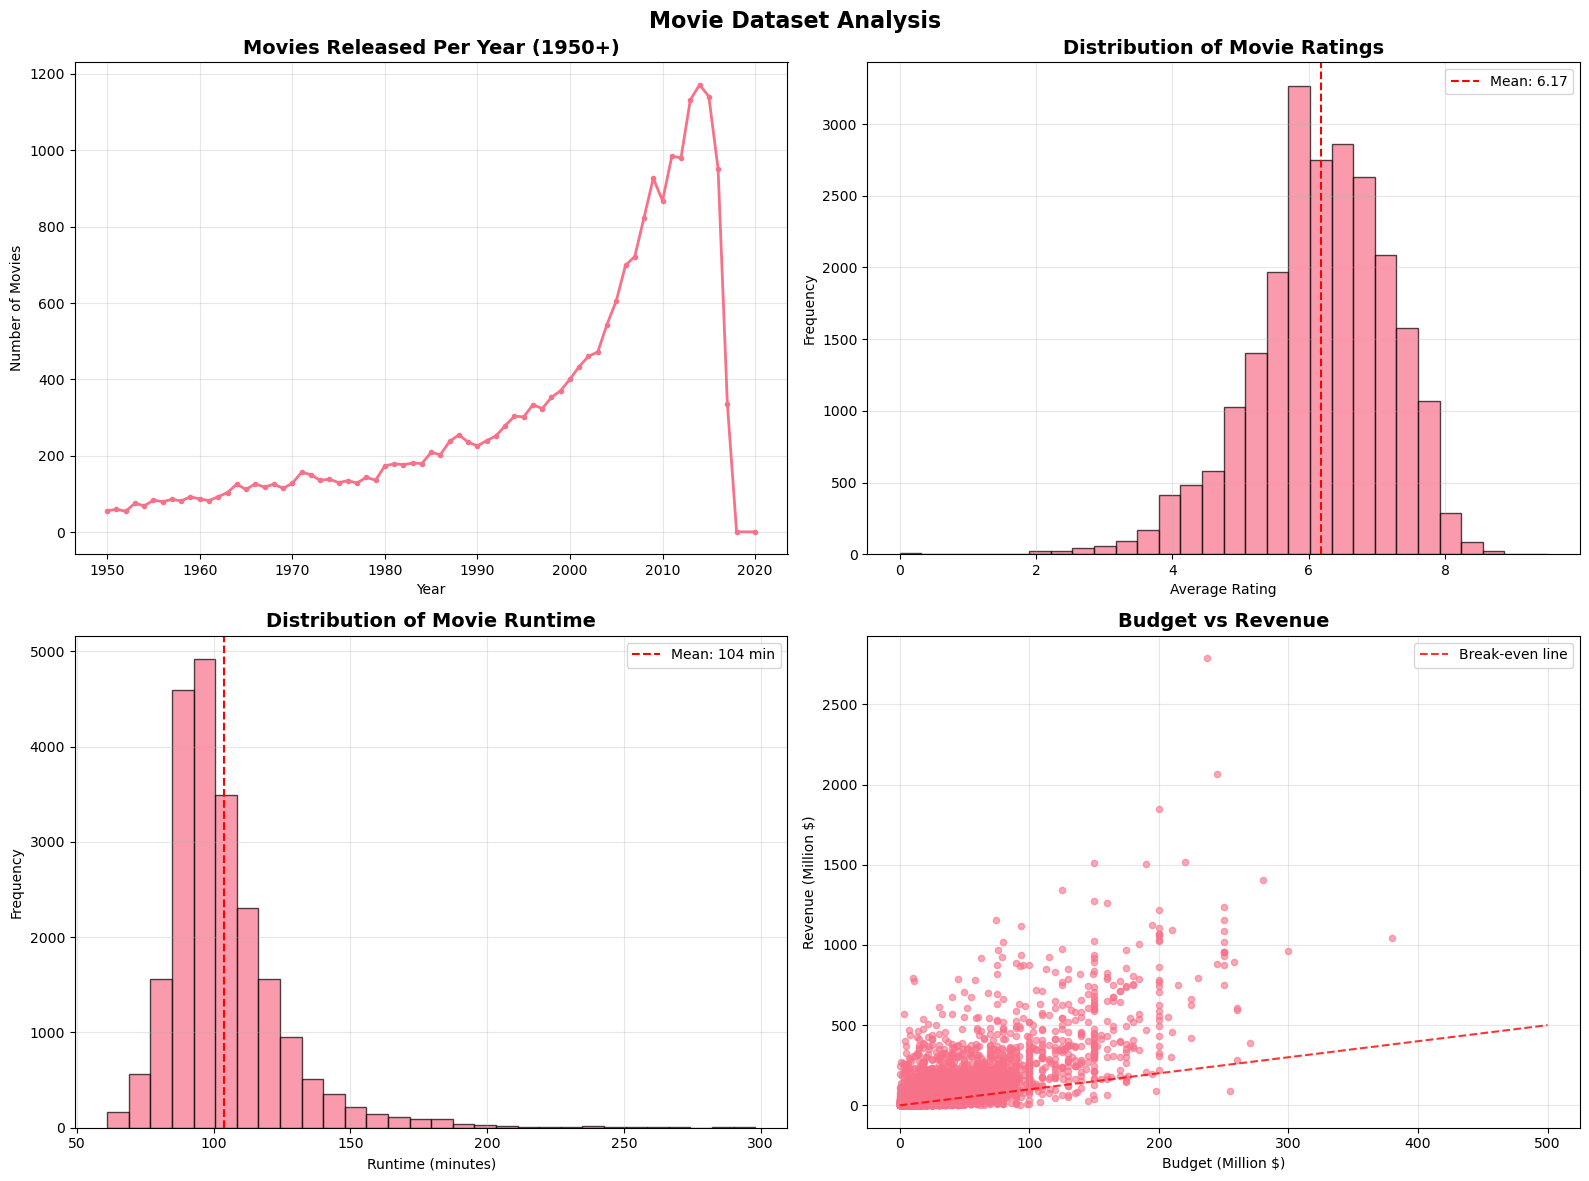

In [6]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Movie Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Movies released per year
yearly_counts = movies_clean.groupby('release_year').size()
yearly_counts = yearly_counts[yearly_counts.index >= 1950]  # Focus on modern era
axes[0,0].plot(yearly_counts.index, yearly_counts.values, linewidth=2, marker='o', markersize=3)
axes[0,0].set_title('Movies Released Per Year (1950+)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Movies')
axes[0,0].grid(True, alpha=0.3)

# 2. Rating distribution
axes[0,1].hist(movies_clean['vote_average'], bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Movie Ratings', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Average Rating')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(movies_clean['vote_average'].mean(), color='red', linestyle='--', 
            label=f'Mean: {movies_clean["vote_average"].mean():.2f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Runtime distribution
runtime_clean = movies_clean['runtime'].dropna()
runtime_clean = runtime_clean[(runtime_clean > 60) & (runtime_clean < 300)]  # Reasonable range
axes[1,0].hist(runtime_clean, bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribution of Movie Runtime', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Runtime (minutes)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(runtime_clean.mean(), color='red', linestyle='--', 
            label=f'Mean: {runtime_clean.mean():.0f} min')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Budget vs Revenue scatter plot
budget_revenue = movies_clean[(movies_clean['budget'] > 0) & (movies_clean['revenue'] > 0)]
budget_revenue = budget_revenue[(budget_revenue['budget'] < 5e8) & (budget_revenue['revenue'] < 3e9)]

axes[1,1].scatter(budget_revenue['budget']/1e6, budget_revenue['revenue']/1e6, 
            alpha=0.6, s=20)
axes[1,1].plot([0, 500], [0, 500], 'r--', alpha=0.8, label='Break-even line')
axes[1,1].set_title('Budget vs Revenue', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Budget (Million $)')
axes[1,1].set_ylabel('Revenue (Million $)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

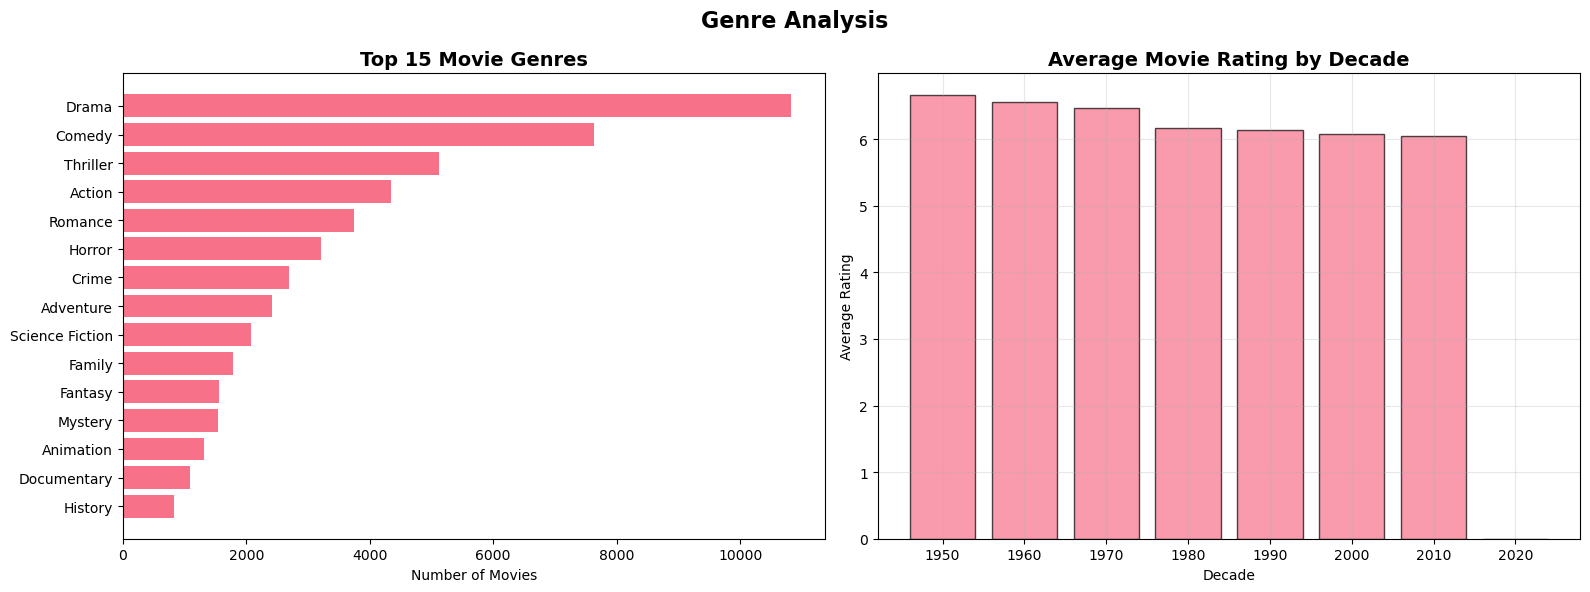

Total unique genres: 20

Top 10 genres by movie count:
  Drama: 10830 movies
  Comedy: 7634 movies
  Thriller: 5128 movies
  Action: 4338 movies
  Romance: 3742 movies
  Horror: 3208 movies
  Crime: 2691 movies
  Adventure: 2414 movies
  Science Fiction: 2076 movies
  Family: 1782 movies


In [7]:
# Genre analysis
all_genres = []
for genres_list in movies_clean['genres_list']:
    all_genres.extend(genres_list)
genre_counts = Counter(all_genres)

# Genre visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Genre Analysis', fontsize=16, fontweight='bold')

# Top genres
top_genres = dict(genre_counts.most_common(15))
axes[0].barh(range(len(top_genres)), list(top_genres.values()))
axes[0].set_yticks(range(len(top_genres)))
axes[0].set_yticklabels(list(top_genres.keys()))
axes[0].set_title('Top 15 Movie Genres', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Movies')
axes[0].invert_yaxis()

# Average rating by decade
movies_clean['decade'] = (movies_clean['release_year'] // 10) * 10
decade_ratings = movies_clean.groupby('decade')['vote_average'].mean()
decade_ratings = decade_ratings[decade_ratings.index >= 1950]

axes[1].bar(decade_ratings.index, decade_ratings.values, width=8, alpha=0.7, edgecolor='black')
axes[1].set_title('Average Movie Rating by Decade', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Rating')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total unique genres: {len(genre_counts)}")
print("\nTop 10 genres by movie count:")
for genre, count in genre_counts.most_common(10):
    print(f"  {genre}: {count} movies")

## 5. Adult Content Analysis

In [8]:
# Detailed analysis of the adult column
print("="*50)
print("ADULT COLUMN ANALYSIS")
print("="*50)

# Check adult column values
print("Adult column value counts:")
print(movies_clean['adult'].value_counts())
print(f"\nAdult column data type: {movies_clean['adult'].dtype}")
print(f"Sample adult values: {movies_clean['adult'].unique()[:10]}")

# Convert adult column to boolean if it's string
if movies_clean['adult'].dtype == 'object':
    movies_clean['adult_bool'] = movies_clean['adult'].map({'True': True, 'False': False, True: True, False: False})
    adult_movies = movies_clean[movies_clean['adult_bool'] == True].shape[0]
    print(f"\nAdult movies (True): {adult_movies}")
    print(f"Family-friendly movies (False): {movies_clean[movies_clean['adult_bool'] == False].shape[0]}")
    adult_col = 'adult_bool'
else:
    adult_movies = movies_clean[movies_clean['adult'] == True].shape[0]
    print(f"\nAdult movies (True): {adult_movies}")
    print(f"Family-friendly movies (False): {movies_clean[movies_clean['adult'] == False].shape[0]}")
    adult_col = 'adult'

print(f"\nFor 'suitable for teenagers' queries:")
print(f"- Filter out adult content: {adult_movies} movies to exclude")
print(f"- Consider Family genre movies: {sum(1 for genres in movies_clean['genres_list'] if 'Family' in genres)} movies")
print(f"- Focus on highly-rated movies (7.0+): {movies_clean[movies_clean['vote_average'] >= 7.0].shape[0]} movies")

ADULT COLUMN ANALYSIS
Adult column value counts:
False    22925
True         3
Name: adult, dtype: int64

Adult column data type: object
Sample adult values: ['False' 'True']

Adult movies (True): 3
Family-friendly movies (False): 22925

For 'suitable for teenagers' queries:
- Filter out adult content: 3 movies to exclude
- Consider Family genre movies: 1782 movies
- Focus on highly-rated movies (7.0+): 5133 movies


---
# Movie Recommendation System

## Building a Content-Based Recommendation System

We'll build a recommendation system using:
1. **Content-Based Filtering**: Using movie features (genres, cast, keywords, overview)
2. **Collaborative Filtering**: Using matrix factorization on the vote data
3. **Hybrid Approach**: Combining both methods